In [1]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
csvpath = ("../Resources//Base_Data.csv")

df = pd.read_csv(csvpath)

df.head()

,Start Date,End Date,County,State,Property Type,Median Sale Price,Median Sale Price MoM,Median List Price,Median List Price MoM,Median Price per Sqft,...,Median Days on Market,Median Days on Market MoM,Average Sale to List,Average Sale to List MoM,Sold Above List,Sold Above List MoM,Price Drops,Price Drops MoM,Off Market in Two Weeks,Off Market in Two Weeks MoM
0,2012-01-01,2012-01-31,Atlantic County,NJ,All Residential,"$191,500.00",8.19%,"$222,450.00",18.96%,$112.20,...,126,400.00%,91.32%,0.09%,5.29%,-3.85%,0.00%,0.00%,23.53%,-7.33%
1,2012-01-01,2012-01-31,Atlantic County,NJ,Condo,"$125,000.00",-3.85%,"$222,450.00",18.96%,$166.20,...,99,-5300.00%,88.52%,-0.22%,2.50%,-0.28%,0.00%,0.00%,18.52%,-8.15%
2,2012-01-01,2012-01-31,Atlantic County,NJ,Multi-Family (2-4 Unit),"$190,000.00",52.00%,"$222,450.00",18.96%,$74.39,...,59,-24100.00%,89.90%,15.40%,0.00%,0.00%,0.00%,0.00%,0.00%,-50.00%
3,2012-01-01,2012-01-31,Atlantic County,NJ,Single Family Residential,"$199,000.00",2.05%,"$222,450.00",18.96%,$111.41,...,128,1200.00%,92.32%,-0.35%,6.96%,-4.81%,0.00%,0.00%,31.15%,1.32%
4,2012-01-01,2012-01-31,Atlantic County,NJ,Townhouse,"$112,500.00",-43.47%,"$222,450.00",18.96%,$86.33,...,246,16100.00%,92.03%,5.48%,0.00%,0.00%,0.00%,0.00%,0.00%,-40.00%


In [3]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])
start_date = pd.Timestamp('2022-01-01')
filtered_data = df[df['Start Date'] >= start_date]


In [4]:
#df["End Date"].max()
#post_pandemic_df = df.loc(df["End Date"]> "2021-12-31")
#post_pandemic_df.head()
filtered_data

North = ("Bergen", "Passaic", "Sussex", "Warren", "Morris", "Essex", "Hudson")

Central = ("Hunterdon", "Somerset", "Union", "Middlesex", "Mercer", "Monmouth")

South = ("Burlington", "Ocean", "Camden", "Glourcester", "Atlantic", 'Salem', "Cumberland", "Cape May")

#print(filtered_data)

C:\Users\kimmi\AppData\Local\Temp\ipykernel_32744\128616955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_type["Median Price per Sqft"] = property_type["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')


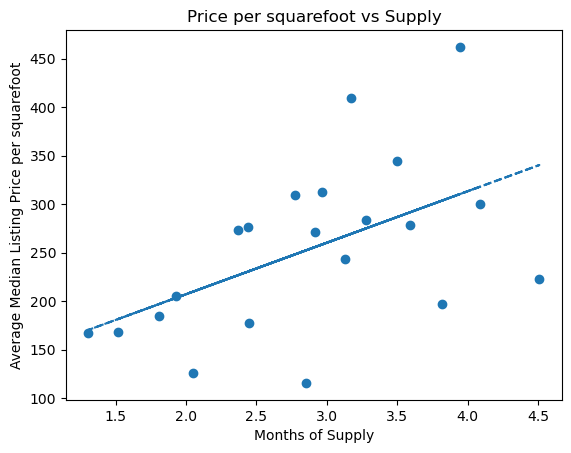

0.01478727110676067


In [5]:
property_type= filtered_data[["Start Date","County","Property Type", "Median Price per Sqft", "New Listings", "Months of Supply"]]
property_type["Median Price per Sqft"] = property_type["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')


ave_med_sale = property_type.groupby(['County'])["Median Price per Sqft"].mean()

ave_med_sale

ave_new_listing = property_type.groupby(['County'])["New Listings"].mean()

ave_new_listing

ave_supply = property_type.groupby(['County'])["Months of Supply"].mean()

ave_supply

(slope, int, r, p, std_err)= stats.linregress(ave_supply, ave_med_sale)
fit = slope * ave_supply + int


plt.scatter(ave_supply, ave_med_sale)
plt.plot(ave_supply,fit,"--")
plt.xlabel("Months of Supply")
plt.ylabel("Average Median Listing Price per squarefoot")
plt.title("Price per squarefoot vs Supply")
plt.show()

print(p)


In [6]:
property_type= filtered_data[["Start Date","County","Property Type", "Median Price per Sqft", "New Listings", "Months of Supply"]]
property_type["Median Price per Sqft"] = property_type["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')

date_2022 = pd.Timestamp('2022-12-01')

property_type_2022 = property_type[property_type['Start Date'] <= date_2022]
property_type_2022

ave_med_sale_2022 = property_type_2022.groupby(['County'])["Median Price per Sqft"].mean()

ave_med_sale_2022

ave_new_listing_2022 = property_type_2022.groupby(['County'])["New Listings"].mean()

ave_new_listing_2022

ave_supply_2022 = property_type_2022.groupby(['County'])["Months of Supply"].mean()

ave_supply_2022





C:\Users\kimmi\AppData\Local\Temp\ipykernel_32744\755628865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_type["Median Price per Sqft"] = property_type["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')


County
Atlantic County      3.550000
Bergen County        3.466667
Burlington County    1.216667
Camden County        1.400000
Cape May County      3.616667
Cumberland County    2.000000
Essex County         2.733333
Gloucester County    1.266667
Hudson County        3.366667
Hunterdon County     3.560000
Mercer County        1.966667
Middlesex County     2.283333
Monmouth County      2.775862
Morris County        3.661017
Ocean County         2.783333
Passaic County       2.150000
Salem County         2.431373
Somerset County      2.633333
Sussex County        4.240741
Union County         2.942308
Warren County        2.108696
Name: Months of Supply, dtype: float64

In [7]:
date_2023 = pd.Timestamp('2023-12-01')

property_type_2023 = property_type[property_type['Start Date'] >= date_2022]
property_type_2023 = property_type[property_type['Start Date'] <= date_2023]
property_type_2023

ave_med_sale_2023 = property_type_2023.groupby(['County'])["Median Price per Sqft"].mean()

ave_med_sale_2023

ave_new_listing_2023 = property_type_2023.groupby(['County'])["New Listings"].mean()

ave_new_listing_2023

ave_supply_2023 = property_type_2023.groupby(['County'])["Months of Supply"].mean()

ave_supply_2023

County
Atlantic County      3.658333
Bergen County        3.458333
Burlington County    1.733333
Camden County        1.475000
Cape May County      3.908333
Cumberland County    2.009259
Essex County         3.133333
Gloucester County    1.325000
Hudson County        3.233333
Hunterdon County     3.052632
Mercer County        1.875000
Middlesex County     2.258333
Monmouth County      2.752137
Morris County        3.694915
Ocean County         2.883333
Passaic County       2.283333
Salem County         2.590000
Somerset County      2.948718
Sussex County        4.413462
Union County         2.770000
Warren County        2.238636
Name: Months of Supply, dtype: float64

In [8]:
date_2024 = pd.Timestamp('2024-01-01')

property_type_2024 = property_type[property_type['Start Date'] >= date_2024]
property_type_2024

ave_med_sale_2024 = property_type_2024.groupby(['County'])["Median Price per Sqft"].mean()

ave_med_sale_2024

ave_new_listing_2024 = property_type_2024.groupby(['County'])["New Listings"].mean()

ave_new_listing_2024

ave_supply_2024 = property_type_2024.groupby(['County'])["Months of Supply"].mean()

ave_supply_2024

County
Atlantic County      4.750000
Bergen County        3.750000
Burlington County    2.250000
Camden County        1.750000
Cape May County      4.150000
Cumberland County    2.294118
Essex County         4.150000
Gloucester County    1.200000
Hudson County        2.800000
Hunterdon County     3.600000
Mercer County        2.250000
Middlesex County     3.050000
Monmouth County      2.900000
Morris County        6.526316
Ocean County         3.100000
Passaic County       3.400000
Salem County         4.411765
Somerset County      7.777778
Sussex County        5.125000
Union County         4.117647
Warren County        3.846154
Name: Months of Supply, dtype: float64

In [9]:
growth_med_sale_value = (ave_med_sale_2024-ave_med_sale_2022)/ave_med_sale_2022

growth_med_sale_value

growth_supply = (ave_supply_2024-ave_supply_2022)/ave_supply_2022

growth_supply_df =pd.DataFrame(growth_supply)

growth_supply_df = growth_supply_df.reset_index()

growth_supply_df

growth_med_sale_value

County
Atlantic County      0.163324
Bergen County        0.129881
Burlington County    0.153836
Camden County        0.208790
Cape May County      0.178137
Cumberland County    0.134915
Essex County         0.123630
Gloucester County    0.185798
Hudson County        0.073486
Hunterdon County     0.134063
Mercer County        0.202342
Middlesex County     0.189946
Monmouth County      0.146188
Morris County        0.145988
Ocean County         0.059127
Passaic County       0.112456
Salem County         0.340306
Somerset County      0.154068
Sussex County        0.509837
Union County         0.184287
Warren County        0.209859
Name: Median Price per Sqft, dtype: float64

C:\Users\kimmi\AppData\Local\Temp\ipykernel_32744\4067488437.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(label, (growth_supply_df['Months of Supply'][i], growth_med_sale_value[i]), xytext=(10,10),color="white", textcoords='offset points')


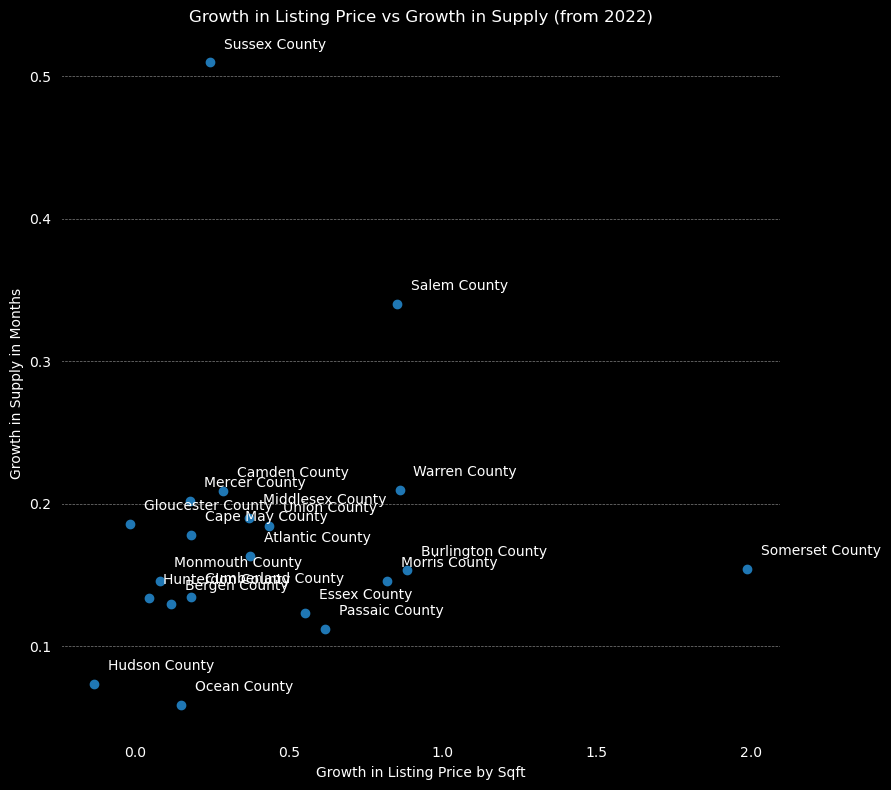

In [10]:
labels = growth_supply_df["County"]
colors = {
    'All Residential': 'red',
    'Condo': 'purple',
    'Multi-Family (2-4 Unit)': 'green',
    'Single Family Residential': 'orange',
    'Townhouse': 'gray'
}
plt.figure(figsize=(8, 8), facecolor='black')
plt.scatter(growth_supply_df['Months of Supply'], growth_med_sale_value)
plt.xlabel('Growth in Listing Price by Sqft', color='white')
plt.ylabel('Growth in Supply in Months', color='white')
plt.title('Growth in Listing Price vs Growth in Supply (from 2022)', color='white')
plt.xticks(ha='right', color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('black')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
for i, label in enumerate(labels):
    plt.annotate(label, (growth_supply_df['Months of Supply'][i], growth_med_sale_value[i]), xytext=(10,10),color="white", textcoords='offset points')
plt.show()

In [12]:
csvpath_n = ("../Resources/northern_county_market.csv")

df_north = pd.read_csv(csvpath_n)
df_north['Start Date'] = pd.to_datetime(df['Start Date'])
df_north['End Date'] = pd.to_datetime(df['End Date'])
start_date = pd.Timestamp('2022-01-01')
filtered_data_north = df_north[df_north['Start Date'] >= start_date]

filtered_data_north

,Start Date,End Date,County,Region,State,Property Type,Median Sale Price,Median Sale Price MoM,Median List Price,Median List Price MoM,...,Median Days on Market,Median Days on Market MoM,Average Sale to List,Average Sale to List MoM,Sold Above List,Sold Above List MoM,Price Drops,Price Drops MoM,Off Market in Two Weeks,Off Market in Two Weeks MoM
600,2022-01-01,2022-01-31,Essex County,North,NJ,All Residential,"$340,000.00",13.05%,"$375,000.00",0.00%,...,67,-1900.00%,99.28%,1.26%,34.59%,5.75%,19.31%,0.76%,31.05%,0.60%
601,2022-01-01,2022-01-31,Essex County,North,NJ,Condo,"$275,000.00",37.53%,"$375,000.00",0.00%,...,94,-2400.00%,102.45%,8.70%,20.00%,8.24%,21.86%,1.11%,34.78%,16.03%
602,2022-01-01,2022-01-31,Essex County,North,NJ,Multi-Family (2-4 Unit),"$177,675.00",-8.88%,"$375,000.00",0.00%,...,92,-4700.00%,98.92%,3.20%,29.63%,5.24%,10.47%,0.03%,26.32%,8.13%
603,2022-01-01,2022-01-31,Essex County,North,NJ,Single Family Residential,"$388,000.00",6.30%,"$375,000.00",0.00%,...,57,-1000.00%,99.31%,0.45%,36.74%,5.75%,22.81%,0.26%,32.30%,-1.04%
604,2022-01-01,2022-01-31,Essex County,North,NJ,Townhouse,"$217,500.00",116.42%,"$375,000.00",0.00%,...,217,8500.00%,NaN,NaN,0.00%,-33.33%,38.46%,3.94%,0.00%,-16.67%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,2024-04-01,2024-04-30,Warren County,North,NJ,All Residential,"$247,500.00",10.00%,"$217,450.00",-5.04%,...,55,-2200.00%,97.25%,0.13%,22.97%,1.85%,16.73%,-4.20%,22.62%,0.78%
3481,2024-04-01,2024-04-30,Warren County,North,NJ,Multi-Family (2-4 Unit),"$185,000.00",50.71%,"$217,450.00",-5.04%,...,27,-10900.00%,96.88%,5.06%,25.00%,25.00%,6.25%,0.00%,0.00%,0.00%
3482,2024-04-01,2024-04-30,Warren County,North,NJ,Single Family Residential,"$247,500.00",8.79%,"$217,450.00",-5.04%,...,57,-1900.00%,97.26%,-0.04%,22.92%,1.12%,17.22%,-5.11%,22.37%,-1.09%
3483,2024-04-01,2024-04-30,Warren County,North,NJ,All Residential,"$205,200.00",-17.09%,"$234,950.00",8.05%,...,54,-100.00%,96.57%,-0.68%,22.00%,-0.97%,20.07%,3.34%,17.78%,-4.84%


In [13]:
property_type_north= filtered_data_north[["Start Date","County","Property Type", "Median Price per Sqft", "New Listings", "Months of Supply"]]
property_type_north["Median Price per Sqft"] = property_type_north["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')

ave_med_sale_north = property_type_north.groupby(['County'])["Median Price per Sqft"].mean()

ave_med_sale_north

ave_new_listing_north = property_type_north.groupby(['County'])["New Listings"].mean()

ave_new_listing_north

ave_supply_north = property_type_north.groupby(['County'])["Months of Supply"].mean()

ave_supply_north

C:\Users\kimmi\AppData\Local\Temp\ipykernel_32744\2086481107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_type_north["Median Price per Sqft"] = property_type_north["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')


County
Essex County       7.400000
Hudson County      4.842857
Morris County      7.028571
Passaic County     2.579545
Sussex County     16.326923
Warren County      6.442857
Name: Months of Supply, dtype: float64

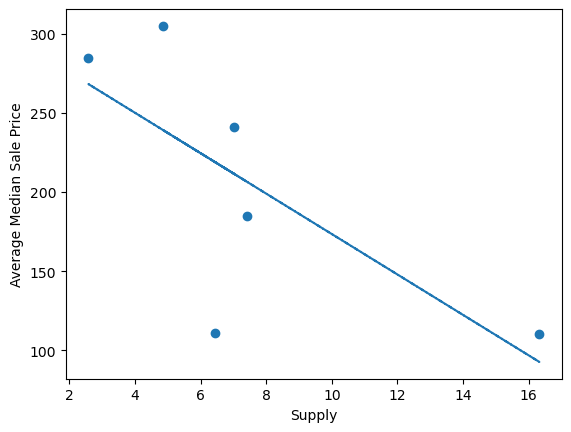

In [14]:
(slope_n, int_n, r_n, p_n, std_err_n)= stats.linregress(ave_supply_north, ave_med_sale_north)
fit_n = slope_n * ave_supply_north + int_n


plt.scatter(ave_supply_north, ave_med_sale_north)
plt.plot(ave_supply_north,fit_n,"--")
plt.xlabel("Supply")
plt.ylabel("Average Median Sale Price")
plt.show()

C:\Users\kimmi\AppData\Local\Temp\ipykernel_32744\3323266585.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_type_south["Median Price per Sqft"] = property_type_south["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')


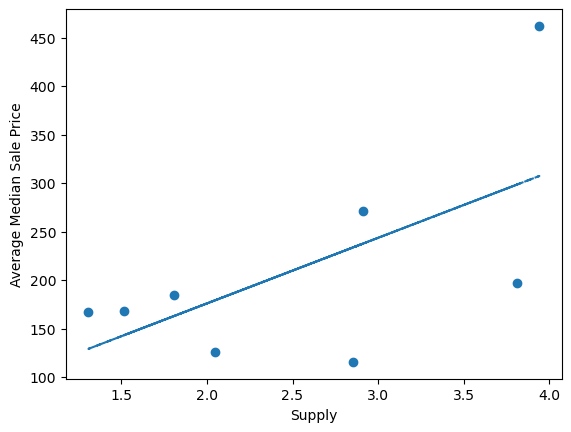

In [16]:
csvpath_s = ("../Resources/southern_county_market.csv")

df_south = pd.read_csv(csvpath_s)
df_south['Start Date'] = pd.to_datetime(df_south['Start Date'])
df_south['End Date'] = pd.to_datetime(df_south['End Date'])
start_date = pd.Timestamp('2022-01-01')
filtered_data_south = df_south[df_south['Start Date'] >= start_date]

filtered_data_south
property_type_south= filtered_data_south[["Start Date","County","Property Type", "Median Price per Sqft", "New Listings", "Months of Supply"]]
property_type_south["Median Price per Sqft"] = property_type_south["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')

ave_med_sale_south = property_type_south.groupby(['County'])["Median Price per Sqft"].mean()

ave_med_sale_south

ave_new_listing_south = property_type_south.groupby(['County'])["New Listings"].mean()

ave_new_listing_south

ave_supply_south = property_type_south.groupby(['County'])["Months of Supply"].mean()

ave_supply_south
(slope_s, int_s, r_s, p_s, std_err_s)= stats.linregress(ave_supply_south, ave_med_sale_south)
fit_s = slope_s * ave_supply_south + int_s


plt.scatter(ave_supply_south, ave_med_sale_south)
plt.plot(ave_supply_south,fit_s,"--")
plt.xlabel("Supply")
plt.ylabel("Average Median Sale Price")
plt.show()

C:\Users\kimmi\AppData\Local\Temp\ipykernel_32744\1201789452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_type_central["Median Price per Sqft"] = property_type_central["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')


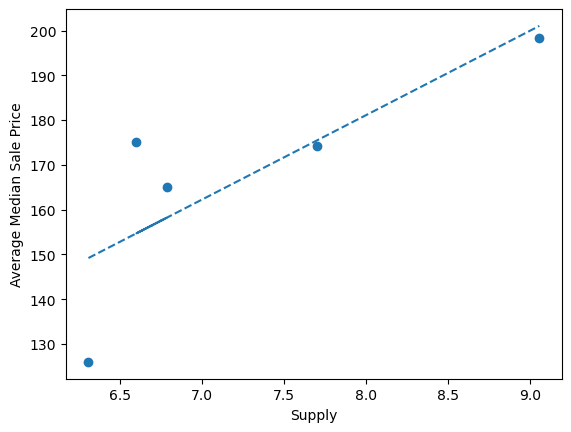

In [18]:
csvpath_c = ("../Resources/central_county_market.csv")

df_central = pd.read_csv(csvpath_c)
df_central['Start Date'] = pd.to_datetime(df_south['Start Date'])
df_central['End Date'] = pd.to_datetime(df_south['End Date'])
start_date = pd.Timestamp('2022-01-01')
filtered_data_central = df_central[df_central['Start Date'] >= start_date]

filtered_data_central
property_type_central= filtered_data_central[["Start Date","County","Property Type", "Median Price per Sqft", "New Listings", "Months of Supply"]]
property_type_central["Median Price per Sqft"] = property_type_central["Median Price per Sqft"].str.replace("$", "").str.replace(",","").astype('float')

ave_med_sale_central = property_type_central.groupby(['County'])["Median Price per Sqft"].mean()

ave_med_sale_central

ave_new_listing_central = property_type_central.groupby(['County'])["New Listings"].mean()

ave_new_listing_central

ave_supply_central = property_type_central.groupby(['County'])["Months of Supply"].mean()

ave_supply_central
(slope_c, int_c, r_c, p_c, std_err_c)= stats.linregress(ave_supply_central, ave_med_sale_central)
fit_c = slope_c * ave_supply_central + int_c


plt.scatter(ave_supply_central, ave_med_sale_central)
plt.plot(ave_supply_central,fit_c,"--")
plt.xlabel("Supply")
plt.ylabel("Average Median Sale Price")
plt.show()

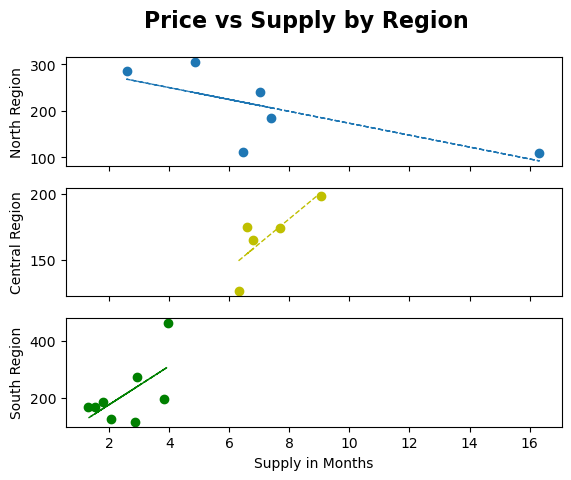

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Price vs Supply by Region", fontsize=16, fontweight="bold")

#ax1.set_xlim(1, 18)
ax1.scatter(ave_supply_north, ave_med_sale_north, marker="o")
ax1.plot(ave_supply_north, fit_n, "--", linewidth=1)
ax1.set_ylabel("North Region")

ax2.scatter(ave_supply_central, ave_med_sale_central, marker="o", color="y")
ax2.plot(ave_supply_central, fit_c, "y--", linewidth=1)
ax2.set_ylabel("Central Region")

ax3.scatter(ave_supply_south, ave_med_sale_south, marker="o", color="g")
ax3.plot(ave_supply_south, fit_s, "g--", linewidth=1)
ax3.set_ylabel("South Region")
ax3.set_xlabel("Supply in Months")

plt.show()

In [20]:
ave_med_sale_central.max()

ave_med_sale_central

County
Mercer County       125.988214
Middlesex County    165.026786
Monmouth County     175.039357
Somerset County     174.276643
Union County        198.273250
Name: Median Price per Sqft, dtype: float64

In [21]:
ave_med_sale_2022

County
Atlantic County      184.239333
Bergen County        328.620000
Burlington County    175.031833
Camden County        154.531333
Cape May County      449.507667
Cumberland County    119.494821
Essex County         269.402333
Gloucester County    155.109000
Hudson County        400.310667
Hunterdon County     232.752500
Mercer County        188.770333
Middlesex County     255.451167
Monmouth County      290.374310
Morris County        284.202034
Ocean County         268.289333
Passaic County       261.928000
Salem County         100.256275
Somerset County      262.493167
Sussex County        201.994528
Union County         293.503600
Warren County        167.790222
Name: Median Price per Sqft, dtype: float64

In [22]:
Median_List_County = filtered_data[["Start Date", "County", "Median List Price per Sqft", "New Listings"]]
Median_List_County["Median List Price per Sqft"] = Median_List_County["Median List Price per Sqft"].str.replace("$", "").astype('float')
Median_List_County_Group = pd.DataFrame(Median_List_County.groupby(["County", "Start Date"])['Median List Price per Sqft'].mean())


New_List_County_Group = pd.DataFrame(Median_List_County.groupby(["County"])['New Listings'].mean())
Median_List_County_Group



C:\Users\kimmi\AppData\Local\Temp\ipykernel_32744\1098196628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Median_List_County["Median List Price per Sqft"] = Median_List_County["Median List Price per Sqft"].str.replace("$", "").astype('float')


Median List Price per Sqft
County          Start Date                            
Atlantic County 2022-01-01                      187.99
                2022-02-01                      189.83
                2022-03-01                      182.07
                2022-04-01                      190.55
                2022-05-01                      195.69
...                                                ...
Warren County   2023-12-01                      207.55
                2024-01-01                      214.37
                2024-02-01                      210.63
                2024-03-01                      229.78
                2024-04-01                      225.63

[588 rows x 1 columns]

In [23]:
County_List_New = pd.merge(Median_List_County_Group, New_List_County_Group, how= "outer", left_index= True, right_index=True)

County_List_New
County_List_New["Ratio"] = County_List_New["Median List Price per Sqft"]/County_List_New["New Listings"]

County_List_New




Median List Price per Sqft  New Listings     Ratio
County          Start Date                                                    
Atlantic County 2022-01-01                      187.99    148.228571  1.268244
                2022-02-01                      189.83    148.228571  1.280657
                2022-03-01                      182.07    148.228571  1.228306
                2022-04-01                      190.55    148.228571  1.285515
                2022-05-01                      195.69    148.228571  1.320191
...                                                ...           ...       ...
Warren County   2023-12-01                      207.55     73.475248  2.824761
                2024-01-01                      214.37     73.475248  2.917581
                2024-02-01                      210.63     73.475248  2.866680
                2024-03-01                      229.78     73.475248  3.127312
                2024-04-01                      225.63     73.475248  3.070830

[588 rows x 3 columns]

In [24]:
#Alternative Analysis

In [25]:
x_axis = County_List_New.reset_index()['Start Date']

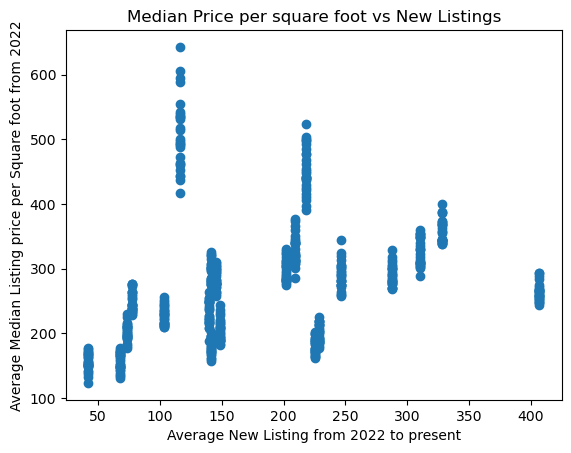

In [26]:
df =County_List_New

y_axis = County_List_New.reset_index()["Median List Price per Sqft"]

x_axis = County_List_New.reset_index()["New Listings"]

labels = County_List_New.reset_index()["County"]



plt.scatter(x_axis, y_axis)
plt.title("Median Price per square foot vs New Listings")
plt.xlabel("Average New Listing from 2022 to present")
plt.ylabel("Average Median Listing price per Square foot from 2022")
plt.show()